In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = "/content/drive/MyDrive/violence_dataset1/new_violence/"
#data_dir = tf.keras.utils.get_file('new_violence', origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir)

In [ ]:
print(data_dir)

/content/drive/MyDrive/violence_dataset1/new_violence/


In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11073 files belonging to 2 classes.
Using 8859 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=200,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11073 files belonging to 2 classes.
Using 2214 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['non_violence', 'violence']


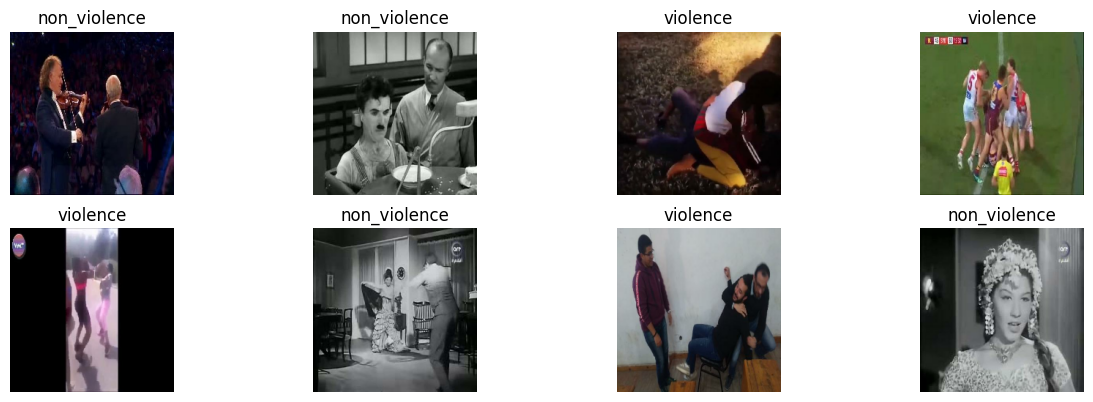

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 1026      
 apper)                                                          
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [ ]:
#from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
#resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
277/277 [==============================] - 1347s 5s/step - loss: 0.2787 - accuracy: 0.9008 - val_loss: 0.1041 - val_accuracy: 0.9612
Epoch 2/10
277/277 [==============================] - 47s 168ms/step - loss: 0.1013 - accuracy: 0.9612 - val_loss: 0.0832 - val_accuracy: 0.9711
Epoch 3/10
277/277 [==============================] - 44s 155ms/step - loss: 0.0605 - accuracy: 0.9796 - val_loss: 0.0712 - val_accuracy: 0.9765
Epoch 4/10
277/277 [==============================] - 46s 163ms/step - loss: 0.0532 - accuracy: 0.9807 - val_loss: 0.0455 - val_accuracy: 0.9878
Epoch 5/10
277/277 [==============================] - 47s 166ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 6/10
277/277 [==============================] - 46s 164ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 7/10
277/277 [==============================] - 46s 161ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0889 - val_acc

In [ ]:
print(history.history['accuracy'])

[0.9007788896560669, 0.961169421672821, 0.9795687794685364, 0.9806975722312927, 0.9906309843063354, 0.9908567667007446, 0.9944689273834229, 0.9954848289489746, 0.9926628470420837, 0.9917597770690918]


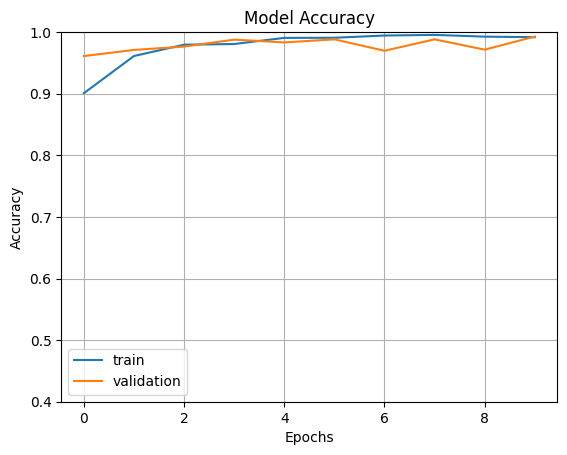

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

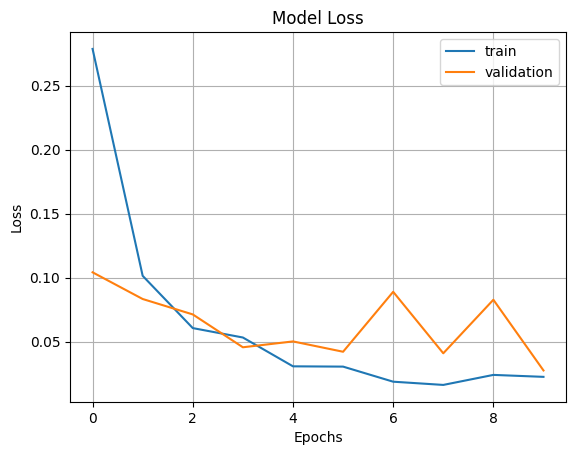

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

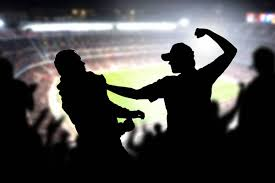

In [ ]:
#data_dir = Path(data_dir)
#violence = list(data_dir.glob('violence/*'))
#print(violence[0])
PIL.Image.open('/content/drive/MyDrive/violence/4.jpg')
#PIL.Image.open('/content/drive/MyDrive/violence_dataset1/new_violence/non_violence/2.jpg')

In [ ]:
import cv2
image=cv2.imread('/content/drive/MyDrive/violence/4.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.00589404 0.99410594]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is violence
